In [1]:
from model import Net
from utils import ModelHelper, visualize_data
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn.functional as F
import torch

# Dataloader

In [2]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1), # Apply center crop of 22 pixels with a probability of 0.1
    transforms.Resize((28, 28)), # Resize the image to 28
    transforms.RandomRotation((-15., 15.), fill=0), # Random rotations between -15 deg to 15 deg and filling of other area with 0 (black)
    transforms.ToTensor(), # convert to Tensor
    transforms.Normalize((0.1307,), (0.3081,)), # Normalize to mean 0.1307 and deviation 0.3081
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(), # convert to Tensor
    transforms.Normalize((0.1307,), (0.3081,)) # Normalise to mean 0.1307 and std 0.3081
    ])

# Download train and test datasets
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms) # Fix test data

batch_size = 512 # Batch Size

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
# pin_memory pins the memory in CPU Ram before sending it to the GPU, helps with reducing CPU to CPU transfers

# Load the dataloaders
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

# Using utils to make life easy

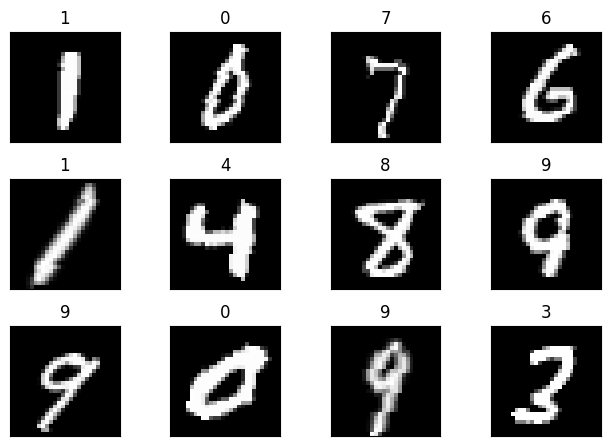

In [3]:
visualize_data(train_loader)

In [4]:
model = Net()
# Mac device has 'mps' as GPU 
mh = ModelHelper(model=model,device='mps', train_loader=train_loader, test_loader=test_loader)

In [5]:
mh.get_model_summary(input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


In [6]:
optimizer = optim.SGD(mh.model.to(mh.device).parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
criterion = F.nll_loss
num_epochs = 20

mh.train(optimizer, scheduler, criterion, num_epochs)

/Users/horz/miniconda3/envs/ml/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=0.9795 Batch_id=117 Accuracy=24.24: 100%|██████████| 118/118 [00:14<00:00,  7.99it/s]


Test set: Average loss: 0.8486, Accuracy: 7012/10000 (70.12%)

Epoch 2


Train: Loss=0.0448 Batch_id=117 Accuracy=92.28: 100%|██████████| 118/118 [00:13<00:00,  8.55it/s]


Test set: Average loss: 0.0684, Accuracy: 9777/10000 (97.77%)

Epoch 3


Train: Loss=0.0564 Batch_id=117 Accuracy=97.09: 100%|██████████| 118/118 [00:13<00:00,  8.65it/s]


Test set: Average loss: 0.0515, Accuracy: 9846/10000 (98.46%)

Epoch 4


Train: Loss=0.0762 Batch_id=117 Accuracy=98.00: 100%|██████████| 118/118 [00:13<00:00,  8.62it/s]


Test set: Average loss: 0.0356, Accuracy: 9878/10000 (98.78%)

Epoch 5


Train: Loss=0.0821 Batch_id=117 Accuracy=98.31: 100%|██████████| 118/118 [00:13<00:00,  8.45it/s]


Test set: Average loss: 0.0374, Accuracy: 9877/10000 (98.77%)

Epoch 6


Train: Loss=0.0852 Batch_id=117 Accuracy=98.46: 100%|██████████| 118/118 [00:13<00:00,  8.44it/s]


Test set: Average loss: 0.0294, Accuracy: 9902/10000 (99.02%)

Epoch 7


Train: Loss=0.0866 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [00:14<00:00,  8.18it/s]


Test set: Average loss: 0.0279, Accuracy: 9895/10000 (98.95%)

Epoch 8


Train: Loss=0.0032 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:13<00:00,  8.49it/s]


Test set: Average loss: 0.0279, Accuracy: 9901/10000 (99.01%)

Epoch 9


Train: Loss=0.0598 Batch_id=117 Accuracy=98.94: 100%|██████████| 118/118 [00:14<00:00,  8.07it/s]


Test set: Average loss: 0.0215, Accuracy: 9926/10000 (99.26%)

Epoch 10


Train: Loss=0.0623 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [00:13<00:00,  8.44it/s]


Test set: Average loss: 0.0192, Accuracy: 9932/10000 (99.32%)

Epoch 11


Train: Loss=0.0051 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [00:13<00:00,  8.50it/s]


Test set: Average loss: 0.0201, Accuracy: 9937/10000 (99.37%)

Epoch 12


Train: Loss=0.0098 Batch_id=117 Accuracy=99.16: 100%|██████████| 118/118 [00:14<00:00,  8.18it/s]


Test set: Average loss: 0.0203, Accuracy: 9930/10000 (99.30%)

Epoch 13


Train: Loss=0.0021 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [00:14<00:00,  8.24it/s]


Test set: Average loss: 0.0221, Accuracy: 9923/10000 (99.23%)

Epoch 14


Train: Loss=0.0622 Batch_id=117 Accuracy=99.22: 100%|██████████| 118/118 [00:14<00:00,  8.38it/s]


Test set: Average loss: 0.0203, Accuracy: 9935/10000 (99.35%)

Epoch 15


Train: Loss=0.0239 Batch_id=117 Accuracy=99.21: 100%|██████████| 118/118 [00:14<00:00,  8.22it/s]


Test set: Average loss: 0.0185, Accuracy: 9938/10000 (99.38%)

Epoch 16


Train: Loss=0.0213 Batch_id=117 Accuracy=99.45: 100%|██████████| 118/118 [00:13<00:00,  8.57it/s]


Test set: Average loss: 0.0152, Accuracy: 9948/10000 (99.48%)

Epoch 17


Train: Loss=0.0065 Batch_id=117 Accuracy=99.52: 100%|██████████| 118/118 [00:13<00:00,  8.59it/s]


Test set: Average loss: 0.0150, Accuracy: 9949/10000 (99.49%)

Epoch 18


Train: Loss=0.0101 Batch_id=117 Accuracy=99.56: 100%|██████████| 118/118 [00:14<00:00,  8.42it/s]


Test set: Average loss: 0.0148, Accuracy: 9954/10000 (99.54%)

Epoch 19


Train: Loss=0.0012 Batch_id=117 Accuracy=99.57: 100%|██████████| 118/118 [00:13<00:00,  8.56it/s]


Test set: Average loss: 0.0157, Accuracy: 9945/10000 (99.45%)

Epoch 20


Train: Loss=0.0622 Batch_id=117 Accuracy=99.56: 100%|██████████| 118/118 [00:13<00:00,  8.55it/s]


Test set: Average loss: 0.0150, Accuracy: 9951/10000 (99.51%)



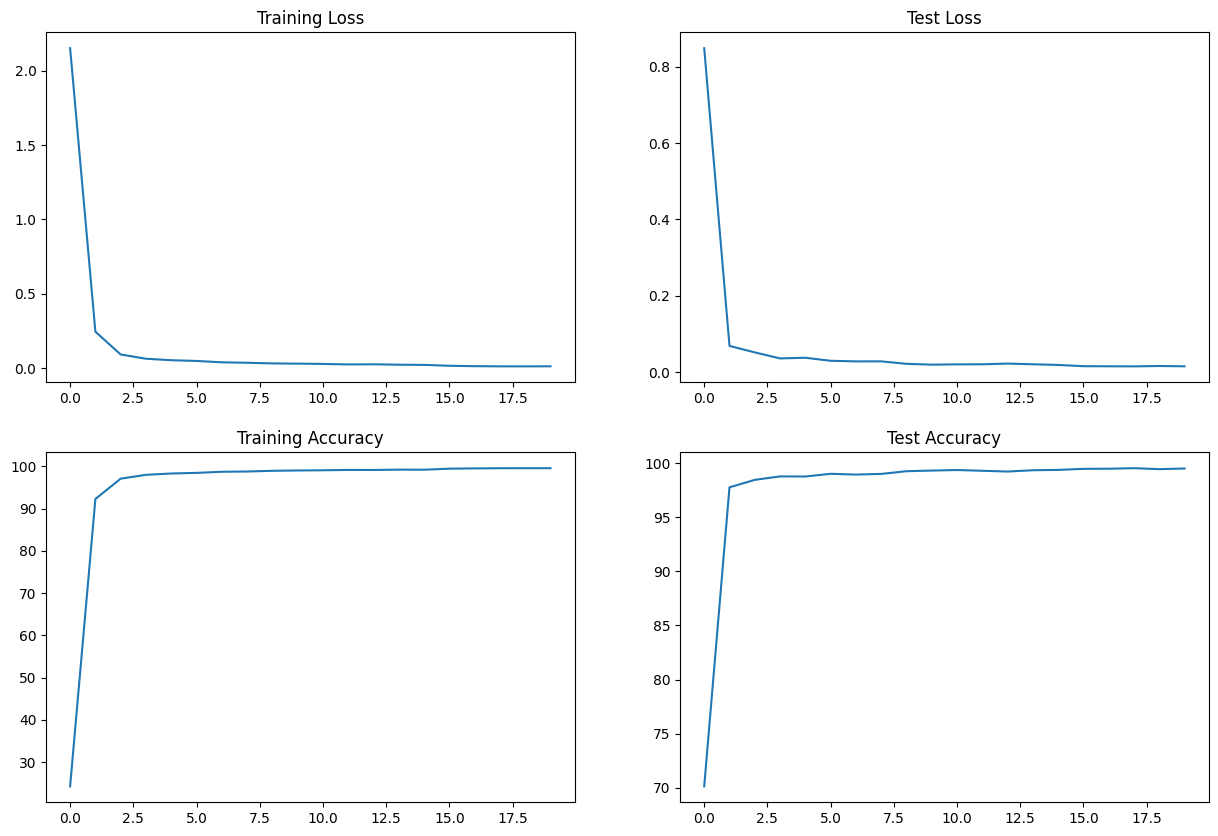

In [7]:
mh.plot()